In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ascendeum/Ascendeum_Dataset2.csv


In [2]:
#Loading the dataset into the df dataframe and then printing the top 5 rows of the same
df = pd.read_csv(r"/kaggle/input/ascendeum/Ascendeum_Dataset2.csv")
df.head()

date  site_id  ad_type_id  geo_id  device_category_id  \
0  2019-06-30 00:00:00      351          10     187                   2   
1  2019-06-30 00:00:00      351          10     187                   2   
2  2019-06-30 00:00:00      351          10     147                   2   
3  2019-06-30 00:00:00      351          10     147                   2   
4  2019-06-30 00:00:00      348          10     147                   3   

   advertiser_id  order_id  line_item_type_id  os_id  integration_type_id  \
0             84      3473                 19     60                    1   
1             84      3473                 19     58                    1   
2             84      3473                 19     60                    1   
3             84      3473                 19     58                    1   
4             79      3463                 20     59                    1   

   monetization_channel_id  ad_unit_id  total_impressions  total_revenue  \
0                        4        5174                 16            0.0   
1                        4        5174                  6            0.0   
2                        4        5174                  4            0.0   
3                        4        5174                  4            0.0   
4                       19        5138                  4            0.0   

   viewable_impressions  measurable_impressions  revenue_share_percent  
0                     2                      16                      1  
1                     0                       6                      1  
2                     0                       4                      1  
3                     0                       4                      1  
4                     0                       4                      1

In [3]:
#Shape of df dataframe
df.shape

(567291, 17)

In [4]:
#Datatype for all columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int64  
 2   ad_type_id               567291 non-null  int64  
 3   geo_id                   567291 non-null  int64  
 4   device_category_id       567291 non-null  int64  
 5   advertiser_id            567291 non-null  int64  
 6   order_id                 567291 non-null  int64  
 7   line_item_type_id        567291 non-null  int64  
 8   os_id                    567291 non-null  int64  
 9   integration_type_id      567291 non-null  int64  
 10  monetization_channel_id  567291 non-null  int64  
 11  ad_unit_id               567291 non-null  int64  
 12  total_impressions        567291 non-null  int64  
 13  total_revenue            567291 non-null  float64
 14  view

#### Since each column has 567291 as the total rows thus there is no null value present in the dataset.

In [5]:
#Number of unque values in the dataframe
for col in df.columns:
    print(col,' --> ',df[col].nunique())

date  -->  30
site_id  -->  10
ad_type_id  -->  2
geo_id  -->  219
device_category_id  -->  5
advertiser_id  -->  23
order_id  -->  75
line_item_type_id  -->  7
os_id  -->  7
integration_type_id  -->  1
monetization_channel_id  -->  5
ad_unit_id  -->  132
total_impressions  -->  1979
total_revenue  -->  10099
viewable_impressions  -->  1159
measurable_impressions  -->  1884
revenue_share_percent  -->  1


#### Dropping integration_type_id and revenue_share_percent column as it has only one value in the column and hence will not have any significant contribution in model bulding. Also dropping order_id and line_item_type_id as the same can be dropped as told in the question.

In [6]:
#Dropping columns that are insignificant for this problem
drop_col = ['integration_type_id','revenue_share_percent','order_id','line_item_type_id']
df.drop(drop_col,axis=1,inplace=True)

In [7]:
#Finding unique value in the date column to check the timeperiod of the data provided.
df['date'].unique()

array(['2019-06-30 00:00:00', '2019-06-29 00:00:00',
       '2019-06-28 00:00:00', '2019-06-27 00:00:00',
       '2019-06-26 00:00:00', '2019-06-25 00:00:00',
       '2019-06-24 00:00:00', '2019-06-23 00:00:00',
       '2019-06-22 00:00:00', '2019-06-21 00:00:00',
       '2019-06-20 00:00:00', '2019-06-19 00:00:00',
       '2019-06-18 00:00:00', '2019-06-17 00:00:00',
       '2019-06-16 00:00:00', '2019-06-15 00:00:00',
       '2019-06-14 00:00:00', '2019-06-13 00:00:00',
       '2019-06-12 00:00:00', '2019-06-11 00:00:00',
       '2019-06-10 00:00:00', '2019-06-09 00:00:00',
       '2019-06-08 00:00:00', '2019-06-07 00:00:00',
       '2019-06-06 00:00:00', '2019-06-05 00:00:00',
       '2019-06-04 00:00:00', '2019-06-03 00:00:00',
       '2019-06-02 00:00:00', '2019-06-01 00:00:00'], dtype=object)

#### It can be seen that one month data has been provided for all days of the July month

In [8]:
#Converting date into the day no of the month
df['date'] = df['date'].str.split('-',expand=True)[2].str.split(' ',expand=True)[0].astype(int)

In [9]:
cols = list(df.columns)
cols.remove('date')

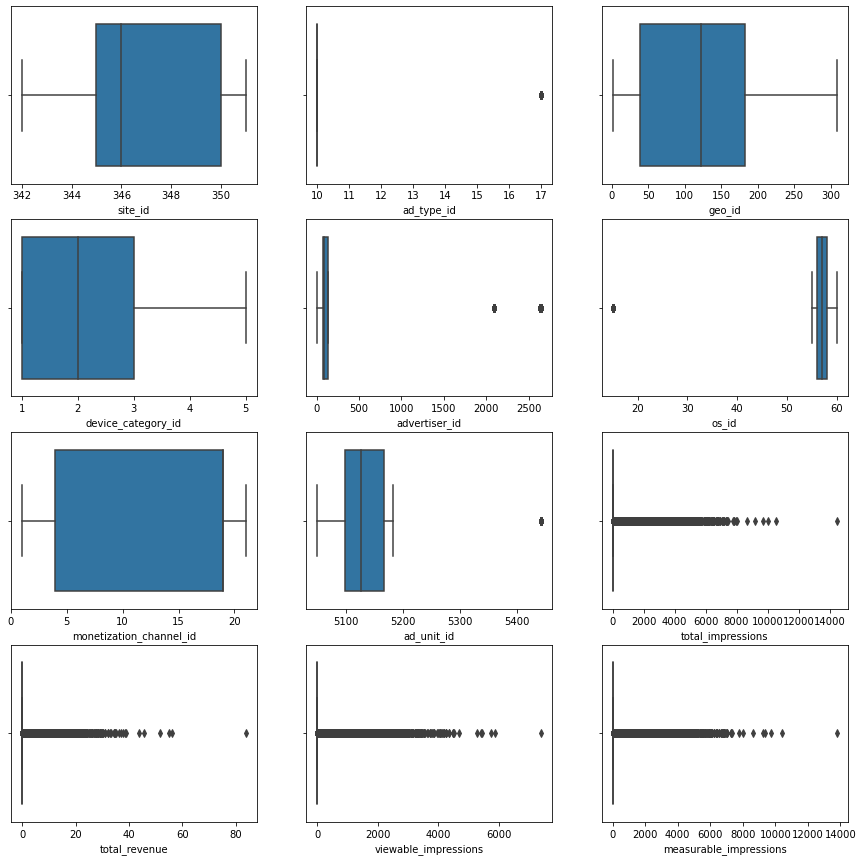

In [10]:
#Plotting boxplot for outlier analysis
    
plt.figure(figsize=(15,15))
count=1
for i in cols:
    plt.subplot(4,3,count)
    sns.boxplot(df[i])
    count+=1
plt.show()

In [11]:
df.ad_type_id[df['ad_type_id']==17].value_counts()

17    17876
Name: ad_type_id, dtype: int64

#### 17876 rows for 17 ad_type_id which cannot be ignored hence cannot be dropped

In [12]:
df.advertiser_id[df['advertiser_id']>1500].value_counts()

2634    11261
2636     5144
2644     4327
2646     2943
2645     2893
2089     2780
2639     2486
2637     2471
2641     1045
2643      922
2640      876
2642      378
2638      323
2635       88
Name: advertiser_id, dtype: int64

#### Rows cannot be dropped taking advertiser_id values into account due to a larger number of records

In [13]:
#Same above reason and hence rows cannot be dropped
df.os_id[df['os_id']<20].value_counts()

15    351
Name: os_id, dtype: int64

In [14]:
#Same above reason and hence rows cannot be dropped
df.ad_unit_id[df['ad_unit_id']>5400].value_counts()

5442    8031
5443    5849
Name: ad_unit_id, dtype: int64

In [15]:
df.total_impressions[df['total_impressions']>14000].value_counts()

14452    1
Name: total_impressions, dtype: int64

In [16]:
#14452 is a very large value in total_impressions column and acting as an outlier hence dropping the same
df = df[df['total_impressions']<14000]

In [17]:
#No rows as the same has been removed in below expression
df.total_revenue[df['total_revenue']>60].value_counts()

Series([], Name: total_revenue, dtype: int64)

In [18]:
#No rows as the same has been removed in below expression
df.viewable_impressions[df['viewable_impressions']>6000].value_counts()

Series([], Name: viewable_impressions, dtype: int64)

In [19]:
#No rows as the same has been removed in below expression
df.measurable_impressions[df['measurable_impressions']>12000].value_counts()

Series([], Name: measurable_impressions, dtype: int64)

In [20]:
#Checking for value smaller than 0 in total_revenue
df[df['total_revenue']<0]

date  site_id  ad_type_id  geo_id  device_category_id  advertiser_id  \
109144    24      351          10     113                   2             79   

        os_id  monetization_channel_id  ad_unit_id  total_impressions  \
109144     58                       19        5179                 22   

        total_revenue  viewable_impressions  measurable_impressions  
109144        -0.1542                     8                      22

In [21]:
#Removing the above obtained outlier in the total_revenue columns having value less than 0
df = df[df['total_revenue']>=0]

In [22]:
#Function for getting quotient after division
def division(dividend,divisor):
    return dividend/divisor if divisor else 0   

In [23]:
#Creating CPM column that will be used as the dependent variable while model building 
df['CPM'] = df.apply(lambda df: division(df['total_revenue'],df['measurable_impressions'])*1000 , axis=1)

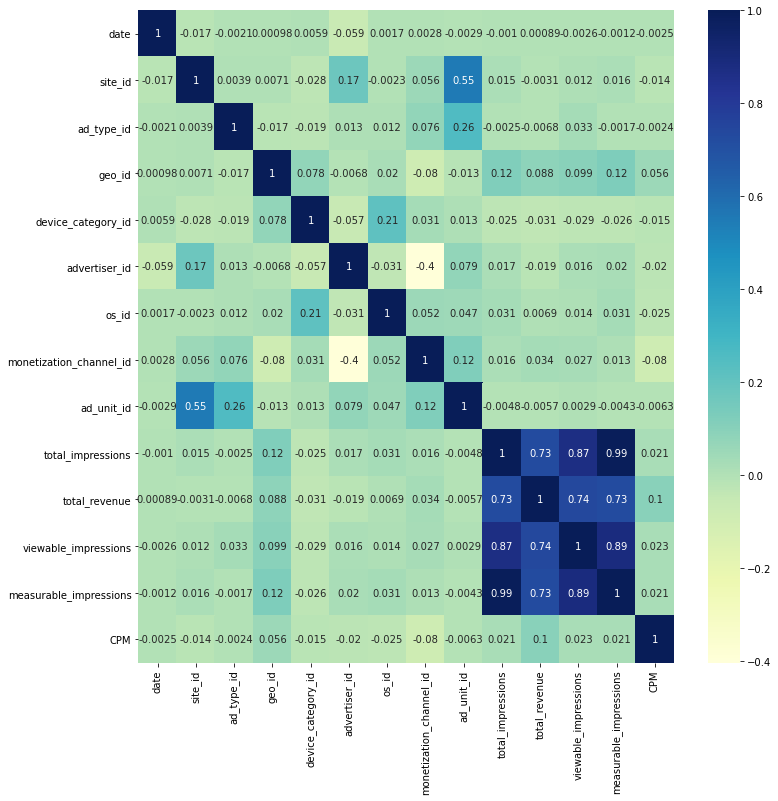

In [24]:
#Heatmap showing correlation between columns in the dataframe
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [25]:
#Feature Engineering - Creating a new column named view_per_mes using viewable_impressions and measurable_impressions
# as these columns are highly correlated to each other
df['view_per_mes']=df.apply(lambda df: division(df['viewable_impressions'],df['measurable_impressions']),axis=1)

In [26]:
#Dropping viewable_impressions and total_revenue columns from dataframe
df.drop(['viewable_impressions','total_revenue'],axis=1,inplace=True)

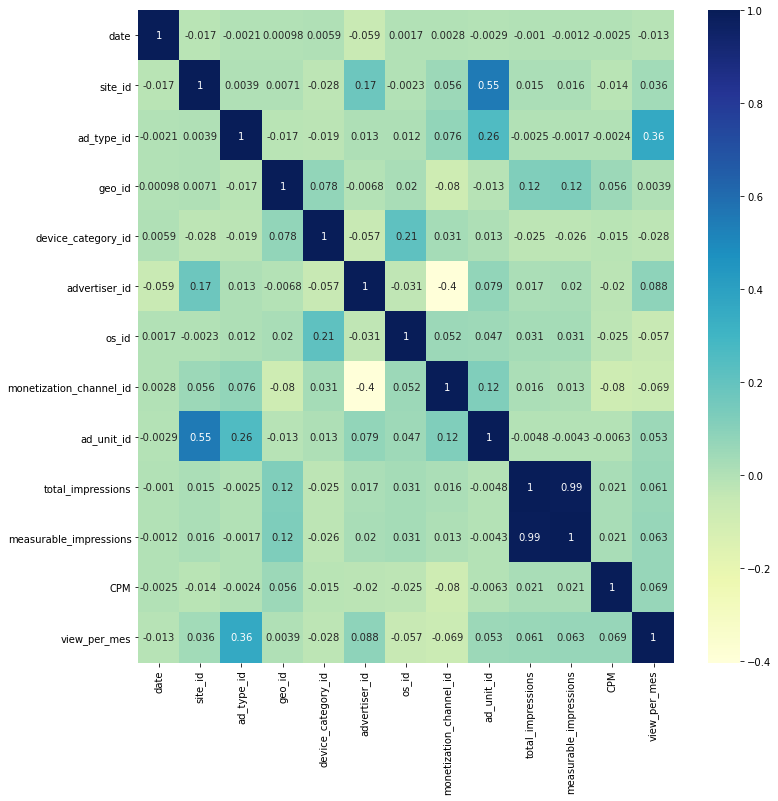

In [27]:
#Correlation matrix after removing the highly correalted column
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

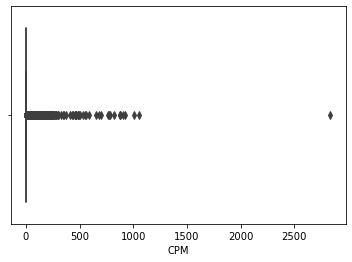

In [28]:
#Since we have to predict the CPM variable thus let's plot boxplot of CPM column to give it a closer look
sns.boxplot(df['CPM'])

In [29]:
#Describing CPM column
df['CPM'].describe([0.5,0.9,0.95,0.99,0.9995,0.9999])

count     567289.000000
mean           1.159496
std            7.412322
min            0.000000
50%            0.000000
90%            2.700000
95%            5.269038
99%           14.300000
99.95%        58.422414
99.99%       229.351720
max         2836.200000
Name: CPM, dtype: float64

#### It can be seen that there are lot of outliers present in the dataframe as 0 to 99.99% values lies between 0 to 229.35 while the rest i.e. a wide range of values from 229.352 to 2836.2 lies in right outer region of data distribution plot

In [30]:
import plotly.express as px

In [31]:
fig = px.line(df, x="date", y="CPM",title='Plotting CPM on datewise')
fig.show()

In [32]:
#Train test split based on the date column, i.e. train dataframe will have values that is having 
#date value less than or equal to 20 while the rest of the records will be in test dataframe.
train = df.loc[df['date']<=20]
test = df.loc[df['date']>20]

In [33]:
train.reset_index(inplace=True)

In [34]:
test.reset_index(inplace=True)

In [35]:
idxT = train.index[:3*len(train)//4]
idxV = train.index[3*len(train)//4:]

In [36]:
train.shape

(374301, 14)

In [37]:
test.shape

(192988, 14)

In [38]:
y_train = train.pop('CPM')
X_train = train

In [39]:
y_test = test.pop('CPM')
X_test = test

In [40]:
cols = list(X_train.columns)
cols.remove('date')
cols.remove('measurable_impressions')

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb_clf = XGBRegressor(tree_method='gpu_hist')

parameters = {"learning_rate": [0.1, 0.01],
               "gamma" : [0.01, 0.1, 0.3, 0.5],
               "max_depth": [5, 7, 10],
               "colsample_bytree": [ 0.6, 0.8],
               "subsample": [0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2],
               "min_child_weight": [1, 3, 5],
               "n_estimators": [50,75,100]}

from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "neg_root_mean_squared_error",
                             cv = 3, random_state = 42,n_jobs=-1)

# Fit the model
model_xgboost = xgb_rscv.fit(X_train, y_train)

# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

Learning Rate:  0.01
Gamma:  0.01
Max Depth:  5
Subsample:  0.7
Max Features at Split:  0.6
Alpha:  1
Lamda:  1.5
Minimum Sum of the Instance Weight Hessian to Make a Child:  3
Number of Trees:  75


In [43]:
clf = XGBRegressor(tree_method='gpu_hist',learning_rate=0.01,gamma=0.01,max_depth=5,subsample=0.7,
                  colsample_bytree=0.6,reg_alpha=1,reg_lambda=1.5,min_child_weight=3,n_estimators=75)

In [44]:
clf.fit(X_train[cols].iloc[idxT],y_train.iloc[idxT],
        eval_set=[(X_train[cols].iloc[idxV],y_train.iloc[idxV])],verbose=100,
        early_stopping_rounds=300)

[0]	validation_0-rmse:4.97862
Will train until validation_0-rmse hasn't improved in 300 rounds.
[74]	validation_0-rmse:4.77006


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.01, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan,
             monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0)', n_estimators=75,
             n_jobs=0, num_parallel_tree=1, random_state=0, reg_alpha=1,
             reg_lambda=1.5, scale_pos_weight=1, subsample=0.7,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [45]:
pred = clf.predict(X_test[cols])

In [46]:
from sklearn.metrics import mean_squared_error
print('MSE for XGBRegressor Model:',mean_squared_error(y_test, pred))
print('RMSE for XGBRegressor Model:', np.sqrt(mean_squared_error(y_test, pred)))

MSE for XGBRegressor Model: 32.05654566002549
RMSE for XGBRegressor Model: 5.661850020975961


In [47]:
XGBRegressor_df= pd.DataFrame(X_test.date.values, columns=['Date'])
XGBRegressor_df['Actual_CPM']= y_test
XGBRegressor_df['Predicted_CPM']= pred
XGBRegressor_df

Date  Actual_CPM  Predicted_CPM
0         30    0.000000       1.147798
1         30    0.000000       1.695707
2         30    0.000000       0.718175
3         30    0.000000       0.757925
4         30    0.000000       0.593325
...      ...         ...            ...
192983    21    6.840000       1.121742
192984    21    6.389474       1.552249
192985    21    3.600000       0.910501
192986    21    0.000000       0.337219
192987    21    0.000000       0.257574

[192988 rows x 3 columns]

In [48]:
XGBRegressor_df["Predicted_CPM"].describe()

count    192988.000000
mean          0.851270
std           0.639695
min           0.222760
25%           0.293328
50%           0.788868
75%           1.098431
max          15.055738
Name: Predicted_CPM, dtype: float64

In [52]:
XGBRegressor_df["Actual_CPM"].describe([0,0.5,0.9,0.95,0.99])

count    192988.000000
mean          1.150777
std           5.802431
min           0.000000
0%            0.000000
50%           0.000000
90%           2.766667
95%           5.350000
99%          14.354597
max         919.500000
Name: Actual_CPM, dtype: float64

#### From the above generalised model it can be seen that reserve price of 15 will be a good value for earning profit for publisher. In actual, max value is 919.5 but if we look closely then the values above 99 percentile are outliers. Very less records will fall in this 1 percentile range. For most of 99 percentile records on the lower side, 15 will be the best reserve price for earning profit. 

In [68]:
print("Max Revenue generation prediction threshold on test dataset: ",sum(X_test['measurable_impressions']*0.015))

Max Revenue generation prediction threshold on test dataset:  91171.01999989699


In [69]:
print("Min Revenue generation prediction threshold on test dataset: ",sum(X_test['measurable_impressions']*0.00222760))

Min Revenue generation prediction threshold on test dataset:  13539.504276789581


In [54]:
org = pd.read_csv(r"/kaggle/input/ascendeum/Ascendeum_Dataset2.csv")

In [59]:
org['date'] = org['date'].str.split('-',expand=True)[2].str.split(' ',expand=True)[0].astype(int)

In [60]:
test_org = org.loc[org['date']>20]

In [63]:
print("Actual Revenue generated based on test dataset: ",sum(test_org['total_revenue']))

Actual Revenue generated based on test dataset:  13963.47500000274


#### Test dataset prediction: From the above statement, we can see that using the model given, publisher can make a revenue between 13539.5 to 91171. The original revenue generated is 13963. For max revenue generation, the reserved price can be set as 15.

In [70]:
print("Max Revenue generation prediction threshold on full dataset: ",sum(df['measurable_impressions']*0.015))

Max Revenue generation prediction threshold on full dataset:  273393.3899996699


In [71]:
print("Min Revenue generation prediction threshold on full dataset: ",sum(df['measurable_impressions']*0.00222760))

Min Revenue generation prediction threshold on full dataset:  40600.74103770163


In [65]:
print("Actual Revenue generated based on full dataset: ",sum(org['total_revenue']))

Actual Revenue generated based on full dataset:  39563.119200001944


#### While taking about the full dataset, based on the above statement we can see that using the model given, publisher can make a revenue upto 273393 which is much more than the original value of 39563 by just setting the reserved price as 15. Also the min max range for revenue will be 40600.74 to 273393.39. From this we can see that even the min threshold (i.e. 40600.74) is bigger than the original revenue generated which we got by setting the reserved value as 0.222760.

#### Also a much higher value of reserve price will not be preferred as bidder will lose interest if they have to pay a lot money for a less valued product. So reserved price should always be a value that will attract the bidders and will also help in generating revenue for publishers. We can set a value which will be good for both, thus selecting the 50th percentile value predicted by our model for reserved price i.e. 0.788868.

In [73]:
print("Revenue generation prediction on full dataset by setting reserved price as 0.788868: ",sum(df['measurable_impressions']*0.00788868))

Revenue generation prediction on full dataset by setting reserved price as 0.788868:  143780.8645211947
